In [1]:
import sys, os
sys.path.append(r"C:\Users\micha\OneDrive\Documents\code\pyfi\\")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyfi.base.retrievers import equity
from pyfi.core.timeseries import TimeSeries, Frequency, AggFunc
from pyfi.analytics.time_series.machine_learning.regression import RegType


sns.set_style('whitegrid')

In [14]:
pair = ['WMT', 'AVGO']
label = pair[0] + "_" + pair[1]

In [15]:
df = equity.get_historical_data(tickers = pair, 
                                start_date='2020-09-09', 
                                end_date='2023-11-30')['Close']

norm = (df - df.mean(axis=0)) / df.std(axis=0)

melt = df.reset_index().melt(id_vars = 'Date')

melt_norm = norm.reset_index().melt(id_vars = 'Date')

[*********************100%%**********************]  2 of 2 completed


In [16]:
ts = TimeSeries(
    df = df,
    dep_var =  pair[0],
    indep_var = None
)

ts.curate()

from pyfi.strategies.pair.pair import Pair

In [17]:
pair = Pair(cls = ts)

pair.scan()

,id,r2,r2:p,ci:alph1,ci:alph5,cij:alph1,cij:alph5,alpha,beta,f_statistic,r_squared,ols:p:coef,ols:spd,ols:spd:z,ols:spd:adf:p,price:spd,price:spd:z
0,AVGO_WMT,0.64,0.0,False,False,True,True,120.04,0.04,576.61,0.42,0.0,-3.35,-0.45,0.01,6.03,2.46
1,WMT_AVGO,0.64,0.0,False,True,True,True,-858.06,9.93,576.61,0.42,0.0,248.43,2.18,0.21,0.17,-1.79


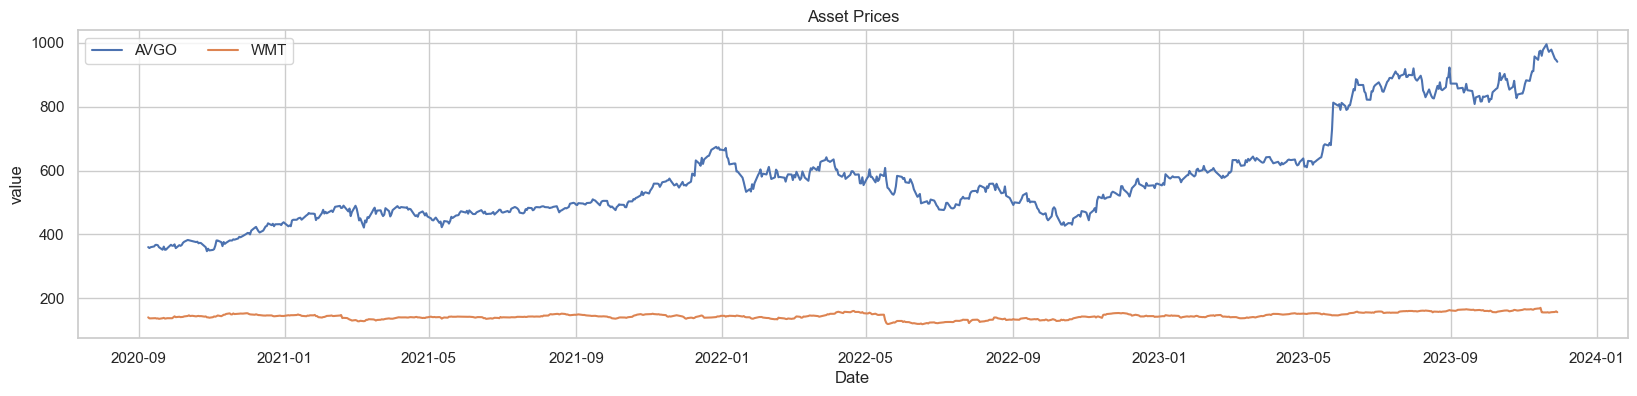

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))

plt.title('Asset Prices')

sns.lineplot(data=melt, x='Date', y='value', hue='variable') 

# plt.savefig(os.path.join(img_dir, 'Asset Prices.png'), bbox_inches = 'tight')

plt.legend(loc='upper left', ncol=2)


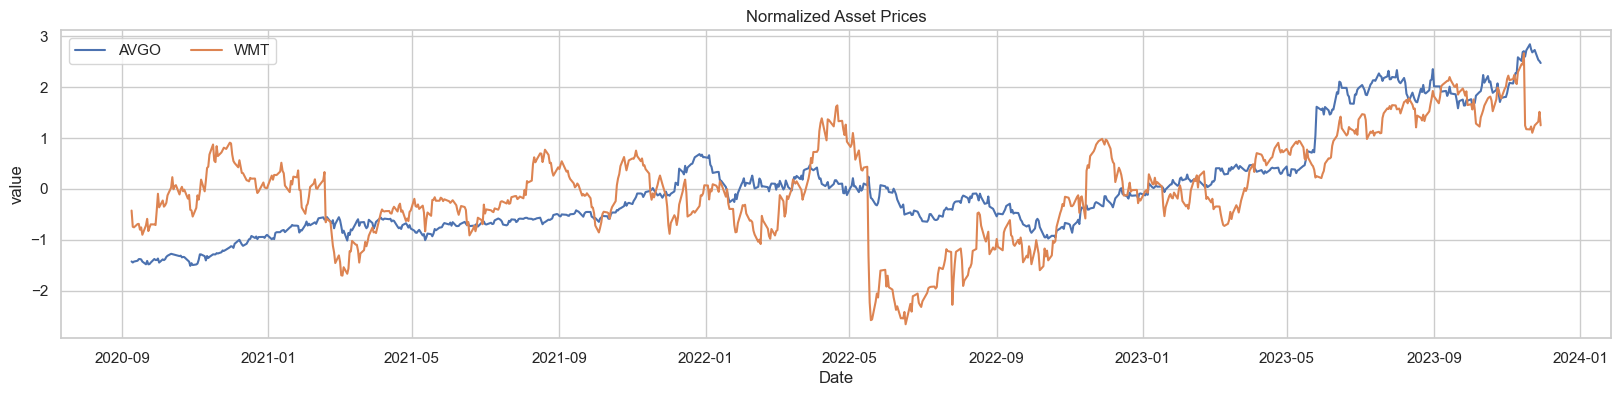

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))

plt.title('Normalized Asset Prices')

sns.lineplot(data=melt_norm, x='Date', y='value', hue='variable') 

# plt.savefig(os.path.join(img_dir, 'Normalized Asset Prices.png'), bbox_inches = 'tight')

plt.legend(loc='upper left', ncol=2)


In [20]:
reg_summary, reg_spread, reg_spread_z, reg_spread_adf, reg_spread_ts, reg_spread_z_ts = pair.regress(how = RegType.COMBINATIONS)

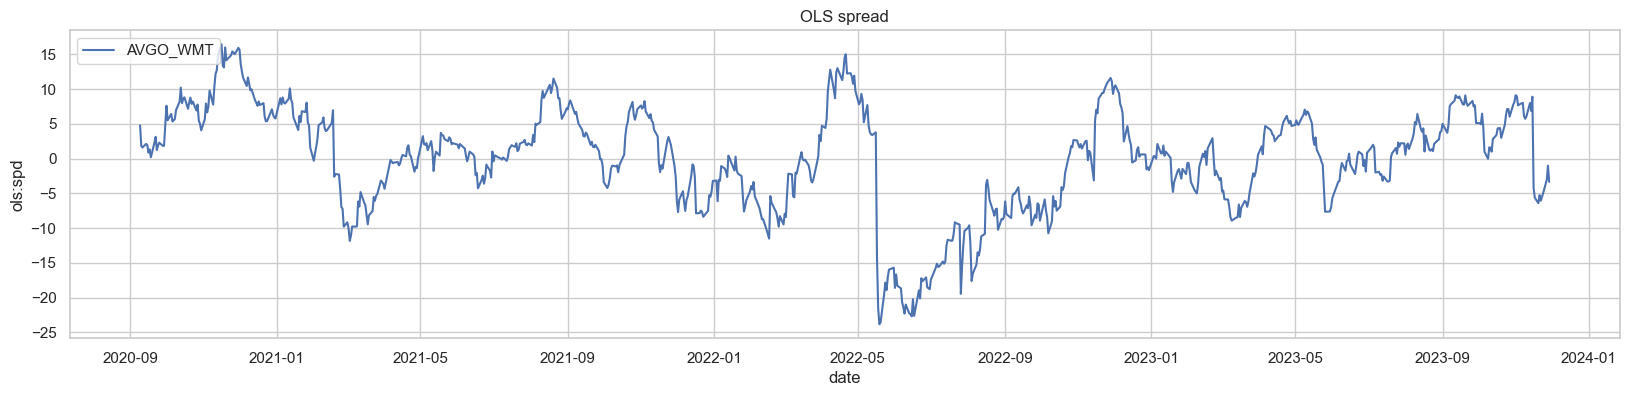

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))

plt.title('OLS spread')

sns.lineplot(data=reg_spread_ts, x='date', y='ols:spd', hue='id') 

plt.legend(loc='upper left', ncol=2)


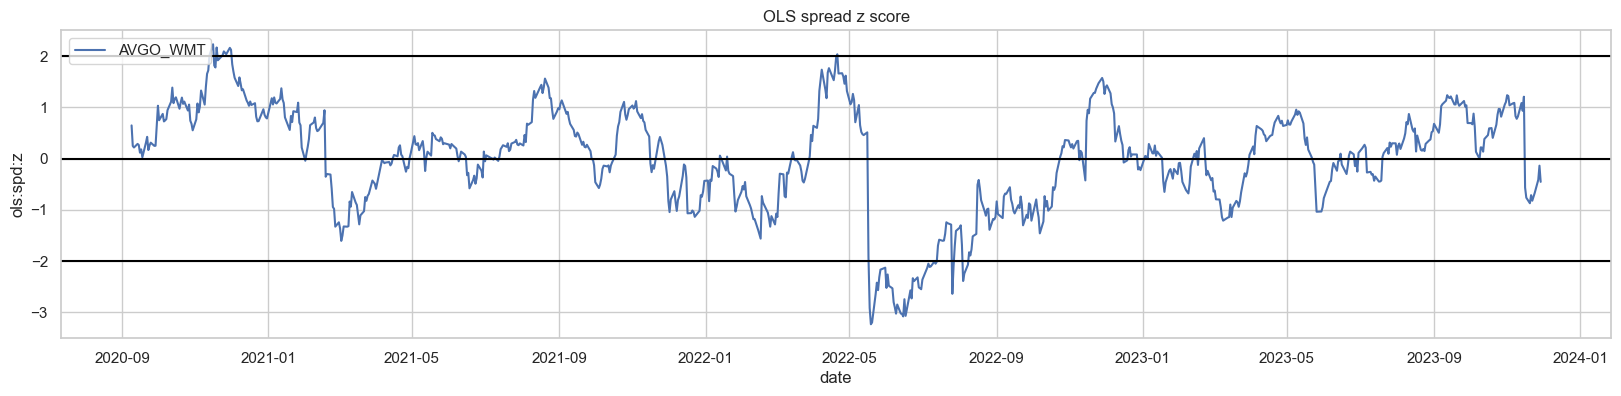

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))

plt.title('OLS spread z score')

sns.lineplot(data=reg_spread_z_ts, x='date', y='ols:spd:z', hue='id') 

ax.axhline(-2, color='black')
ax.axhline(0, color='black')
ax.axhline(2, color='black')

plt.legend(loc='upper left', ncol=2)


In [23]:
price_spread, price_spread_z, price_spread_ts, price_spread_z_ts = pair.price_spread(RegType.COMBINATIONS)

<Axes: title={'center': 'price spread'}, xlabel='date', ylabel='price:spd'>

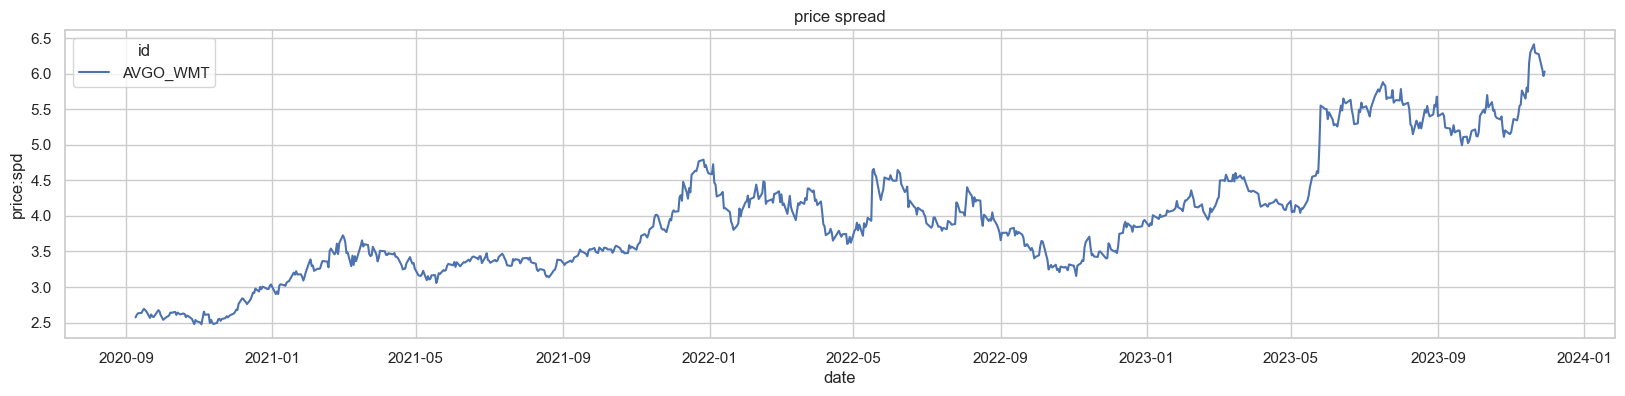

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))

plt.title('price spread')

sns.lineplot(data=price_spread_ts, x='date', y='price:spd', hue='id') 



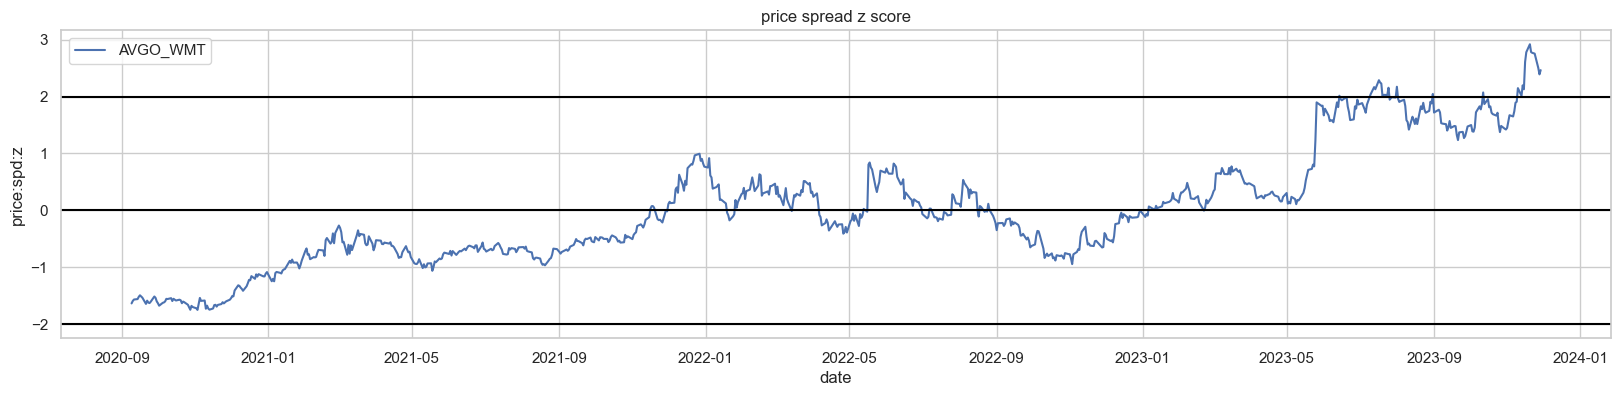

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))

plt.title('price spread z score')

sns.lineplot(data=price_spread_z_ts, x='date', y='price:spd:z', hue='id') 

ax.axhline(-2, color='black')
ax.axhline(0, color='black')
ax.axhline(2, color='black')

plt.legend(loc='upper left', ncol=2)
